In [17]:
!pip install transformers torch accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 6.8 MB/s eta 0:00:00


In [1]:
!pip install paddlepaddle-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [2]:
!pip install "paddleocr>=2.0.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.6/544.6 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 88.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=f5c0806f2dce94cc7a29fd45dc7955d136d545fc513ba50af32799e56b3258db
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [20]:
from google.colab import userdata
my_key = userdata.get("HF_TOKEN")

In [20]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

In [ ]:
model_id = "meta-llama/Meta-Llama-3-8B"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type = "nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, use_cache=False)



In [23]:
!pip install pipeline
import pipeline
text_generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens = 128
)

In [ ]:
def get_response(prompt):
  response = text_generator(prompt)
  return response[0]['generated_text']

In [3]:
from paddleocr import PaddleOCR, draw_ocr

ocr = PaddleOCR(use_angle_cls=True, lang='en')


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:22<00:00, 175.50it/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:20<00:00, 492.98it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:16<00:00, 132.07it/s]

[2024/10/20 14:57:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

[2024/10/20 14:57:55] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2024/10/20 14:57:56] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0


In [35]:
res = ocr.ocr('/content/data/test.png', cls=True)


[2024/10/20 15:53:01] ppocr DEBUG: dt_boxes num : 78, elapsed : 0.2826097011566162
[2024/10/20 15:53:01] ppocr DEBUG: cls num  : 78, elapsed : 0.3381366729736328
[2024/10/20 15:53:02] ppocr DEBUG: rec_res num  : 78, elapsed : 0.43708276748657227


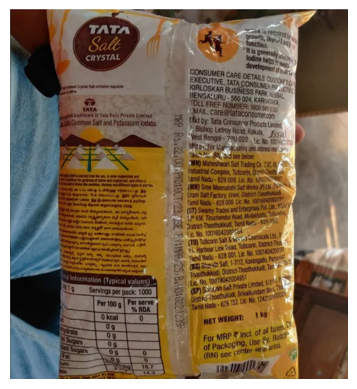

In [33]:
#The image is
import matplotlib.pyplot as plt
import cv2

# Load the image using OpenCV
image_path = '/content/data/test.png'  # Replace with your image path
image = cv2.imread(image_path)

# Convert BGR (OpenCV default) to RGB for displaying correctly
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [36]:
print(res[0])

[[[[241.0, 43.0], [368.0, 47.0], [367.0, 80.0], [240.0, 76.0]], ('TATA', 0.9703643918037415)], [[[726.0, 50.0], [859.0, 68.0], [856.0, 92.0], [723.0, 73.0]], ('iekorequiredh', 0.5212423801422119)], [[[723.0, 66.0], [866.0, 92.0], [860.0, 122.0], [718.0, 95.0]], ('growth,ayiuda', 0.7213990688323975)], [[[232.0, 78.0], [346.0, 78.0], [346.0, 135.0], [232.0, 135.0]], ('Salt', 0.9929147362709045)], [[[724.0, 90.0], [792.0, 101.0], [788.0, 124.0], [720.0, 112.0]], ('functioa', 0.9469380378723145)], [[[229.0, 136.0], [336.0, 132.0], [337.0, 160.0], [231.0, 164.0]], ('CRYSTAL', 0.9965662360191345)], [[[722.0, 134.0], [865.0, 158.0], [861.0, 183.0], [718.0, 159.0]], ('lodine hes  ', 0.711639404296875)], [[[722.0, 159.0], [868.0, 182.0], [864.0, 206.0], [718.0, 183.0]], ('development afoc', 0.8186060786247253)], [[[176.0, 231.0], [343.0, 231.0], [343.0, 243.0], [176.0, 243.0]], ('n Sl ', 0.5009740591049194)], [[[550.0, 222.0], [843.0, 251.0], [841.0, 278.0], [547.0, 249.0]], ('KIRLOSKAR BUSINES

In [43]:
prompt = "In the given information below get me the brand name, what produce it is, Manifacturing or Packed date, Expiry date or best before months or days the data is as follows:"
out = []
for i in res[0]:
  out.append(i[1][0])
prompt += "\n".join(out)
response = get_response(prompt)
print()
print(response)

Item : TATA Salt
Packed Date: October 2023
Best Before: 2025
